In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(
    '/content/Image_6.png')


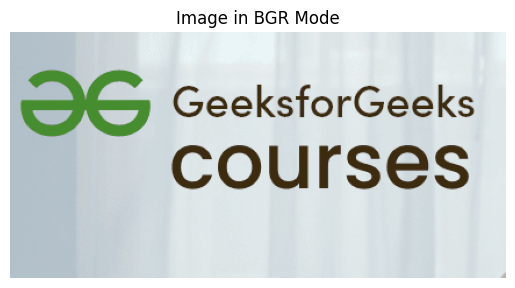

In [ ]:
# Display the image in BGR Mode
plt.imshow(image)
plt.title('Image in BGR Mode')
plt.axis('off')
plt.show()

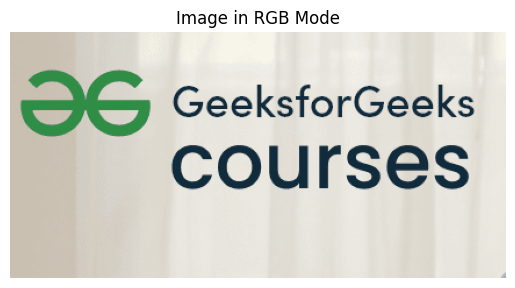

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image in RGB Mode
plt.imshow(image)
plt.title('Image in RGB Mode')
plt.axis('off')
plt.show()


In [ ]:
height, width, num_channels = image.shape
print("Height:", height)
print("Width:", width)
print("No. of channels:", num_channels)
print("Total no. of pixels in the image:", height * width)


Height: 212
Width: 427
No. of channels: 3
Total no. of pixels in the image: 90524


In [ ]:
flat_image = image.reshape(-1, 3)
print("First 10 pixels (flattened):")
for i in range(10):
    print(f"Pixel {i+1} (R value, G value, B value): {flat_image[i]}")


First 10 pixels (flattened):
Pixel 1 (R value, G value, B value): [199 189 174]
Pixel 2 (R value, G value, B value): [201 192 177]
Pixel 3 (R value, G value, B value): [201 192 177]
Pixel 4 (R value, G value, B value): [201 192 177]
Pixel 5 (R value, G value, B value): [201 192 177]
Pixel 6 (R value, G value, B value): [203 193 179]
Pixel 7 (R value, G value, B value): [201 192 177]
Pixel 8 (R value, G value, B value): [201 192 177]
Pixel 9 (R value, G value, B value): [201 192 177]
Pixel 10 (R value, G value, B value): [201 192 177]


In [ ]:
counter = 0

print("RGB values of the first 10 pixels:")
for row in range(height):
    for col in range(width):
        if counter < 10:
            r, g, b = image[row, col]
            print(f"Pixel {counter + 1} at (row {row}, col {col}): [{r}, {g}, {b}]")
            counter += 1
        else:
            break
    if counter >= 10:
        break


RGB values of the first 10 pixels:
Pixel 1 at (row 0, col 0): [199, 189, 174]
Pixel 2 at (row 0, col 1): [201, 192, 177]
Pixel 3 at (row 0, col 2): [201, 192, 177]
Pixel 4 at (row 0, col 3): [201, 192, 177]
Pixel 5 at (row 0, col 4): [201, 192, 177]
Pixel 6 at (row 0, col 5): [203, 193, 179]
Pixel 7 at (row 0, col 6): [201, 192, 177]
Pixel 8 at (row 0, col 7): [201, 192, 177]
Pixel 9 at (row 0, col 8): [201, 192, 177]
Pixel 10 at (row 0, col 9): [201, 192, 177]


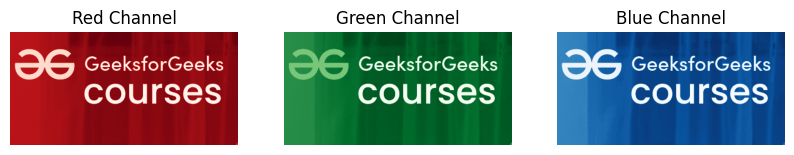

In [ ]:
# Extract the RGB channels
R, G, B = cv2.split(image)

# Display the channels
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(G, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.show()


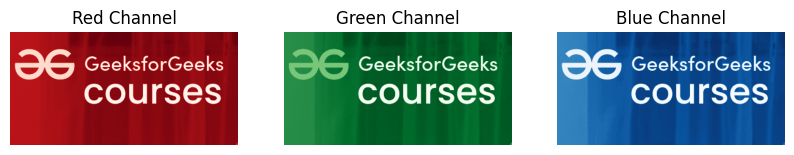

In [ ]:
# Extract the RGB channels
r, g, b = cv2.split(image)

# Display the channels
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.show()


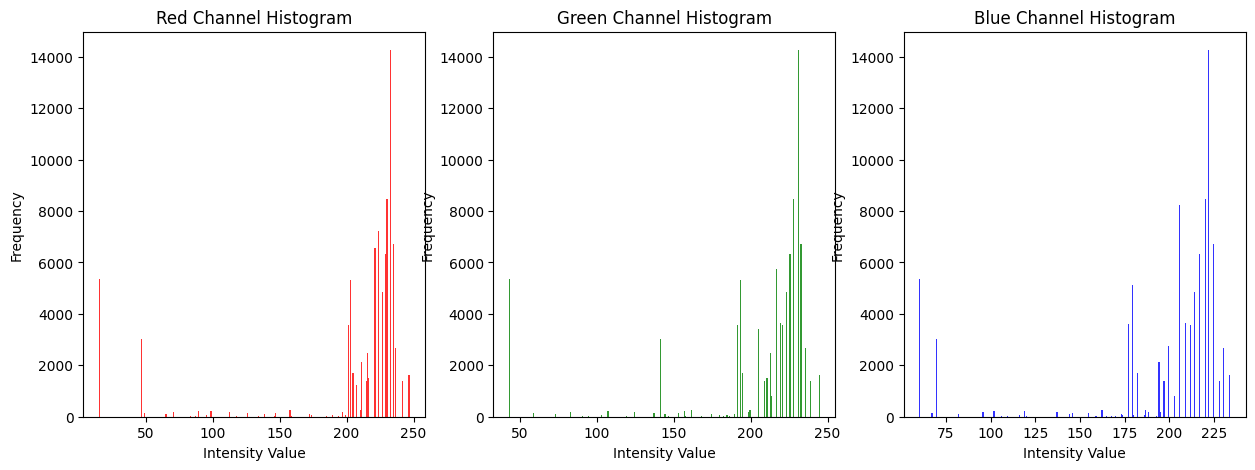

In [ ]:
# Plot histograms
plt.figure(figsize=(15, 5))
colors = ['red', 'green', 'blue']
channels = [R, G, B]

for i, (channel, color) in enumerate(zip(channels, colors)):
    plt.subplot(1, 3, i+1)
    plt.hist(channel.ravel(), bins=256, color=color, alpha=0.8)
    plt.title(f'{color.capitalize()} Channel Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

plt.show()


In [ ]:
# Function to calculate basic statistics
def channel_statistics(channel):
    mean = np.mean(channel)
    median = np.median(channel)
    std_dev = np.std(channel)
    min_val = np.min(channel)
    max_val = np.max(channel)
    return mean, median, std_dev, min_val, max_val


# Calculate statistics for each channel
stats = {}
for channel, color in zip(channels, colors):
    stats[color] = channel_statistics(channel)

print('RGB Channel Statistics:')
for color, stat in stats.items():
    print(
        f'{color.capitalize()} Channel - Mean: {stat[0]:.2f}, Median: {stat[1]:.2f}, Std Dev: {stat[2]:.2f}, Min: {stat[3]}, Max: {stat[4]}')


RGB Channel Statistics:
Red Channel - Mean: 203.69, Median: 227.00, Std Dev: 60.40, Min: 15, Max: 247
Green Channel - Mean: 205.37, Median: 223.00, Std Dev: 47.37, Min: 43, Max: 245
Blue Channel - Mean: 195.46, Median: 214.00, Std Dev: 46.52, Min: 60, Max: 234


In [ ]:
mean_image = np.mean(image, axis=(0, 1))
median_image = np.median(image, axis=(0, 1))
std_dev = np.std(image, axis=(0, 1))
min_val = np.min(image, axis=(0, 1))
max_val = np.max(image, axis=(0, 1))

print('Mean of Each Channel (RGB):', mean_image)
print('Median of Each Channel (RGB):', median_image)
print('Standard Deviation of Each Channel (RGB):', std_dev)
print('Minimum Value of Each Channel (RGB):', min_val)
print('Maximum Value of Each Channel (RGB):', max_val)


Mean of Each Channel (RGB): [203.69252353 205.36800186 195.46079493]
Median of Each Channel (RGB): [227. 223. 214.]
Standard Deviation of Each Channel (RGB): [60.40191266 47.3674443  46.51898555]
Minimum Value of Each Channel (RGB): [15 43 60]
Maximum Value of Each Channel (RGB): [247 245 234]


Correlation Matrix:
   R            G           B
[[1.         0.9650023  0.9882642 ]
 [0.9650023  1.         0.95853895]
 [0.9882642  0.95853895 1.        ]]


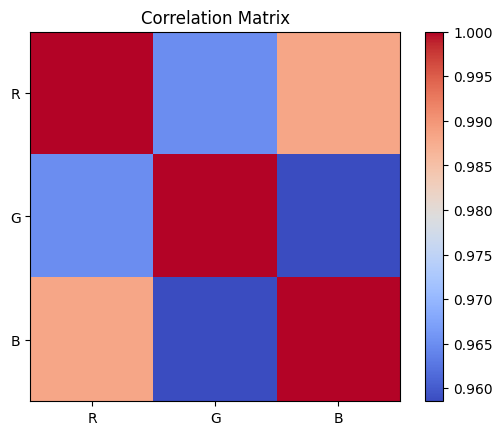

In [ ]:
# Flatten the channels to 1D arrays
R_flatten = R.ravel()
G_flatten = G.ravel()
B_flatten = B.ravel()

# Calculate the correlation matrix
correlation_matrix = np.corrcoef([R_flatten, G_flatten, B_flatten])

print('Correlation Matrix:')
print('   R            G           B')
print(correlation_matrix)

# Visualize the correlation matrix
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks([0, 1, 2], ['R', 'G', 'B'])
plt.yticks([0, 1, 2], ['R', 'G', 'B'])
plt.title('Correlation Matrix')
plt.show()
